In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#0D0D0D",
        "figure.facecolor": "#0A0A0A",
        "grid.color": "#222222",
        "axes.edgecolor": "#0D0D0D",
        "text.color": "#E5A823",
        "axes.labelcolor": "#E5A823",
        "xtick.color": "#FFFFFF",
        "ytick.color": "#FFFFFF",
    }
)

custom_palette = ["#E5A823", "#00CED1", "#FF4500", "#555555"]
sns.set_palette(custom_palette)
sns.despine(left=False, bottom=False)

<Figure size 640x480 with 0 Axes>

In [ ]:
df_transactions = pd.read_csv('/content/transactions_data.csv')
df_user = pd.read_csv('/content/users_data.csv')
df_cards = pd.read_csv('/content/cards_data.csv')

#**Exploring and Pre Processing Users Data**

In [ ]:
df_user.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [ ]:
df_user.isnull().sum()

,0
id,0
current_age,0
retirement_age,0
birth_year,0
birth_month,0
gender,0
address,0
latitude,0
longitude,0
per_capita_income,0


In [ ]:
df_user.duplicated().sum()

np.int64(0)

In [ ]:
df_user.duplicated(['id']).sum()

np.int64(0)

#**Exploring and Pre Processing Cards Data**

In [ ]:
df_cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [ ]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [ ]:
df_cards.isnull().sum()

,0
id,0
client_id,0
card_brand,0
card_type,0
card_number,0
expires,0
cvv,0
has_chip,0
num_cards_issued,0
credit_limit,0


In [ ]:
df_cards.duplicated(['client_id', 'card_number']).sum()

np.int64(0)

#**Exploring and Pre Processing transactions Data**

In [ ]:
df_transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499.0,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311.0,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829.0,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829.0,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813.0,NaN


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146077 entries, 0 to 1146076
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1146077 non-null  int64  
 1   date            1146077 non-null  object 
 2   client_id       1146077 non-null  int64  
 3   card_id         1146077 non-null  int64  
 4   amount          1146077 non-null  object 
 5   use_chip        1146077 non-null  object 
 6   merchant_id     1146077 non-null  int64  
 7   merchant_city   1146077 non-null  object 
 8   merchant_state  1021276 non-null  object 
 9   zip             1014609 non-null  float64
 10  mcc             1146076 non-null  float64
 11  errors          17948 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 104.9+ MB


In [ ]:
df_transactions.isnull().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,124801
zip,131468


In [ ]:
df_transactions.duplicated().sum()

np.int64(0)

In [ ]:
df_transactions['errors'].value_counts()

,count
errors,
Insufficient Balance,11170
Bad PIN,2764
Technical Glitch,2221
Bad Card Number,614
Bad CVV,530
Bad Expiration,469
Bad Zipcode,94
"Bad PIN,Insufficient Balance",26
"Insufficient Balance,Technical Glitch",22


In [ ]:
df_transactions['errors'].fillna("No Error",inplace=True)

# **Load And Pre Processing Fraud Labels**


In [ ]:
fraud_dectionary = pd.read_json('train_fraud_labels.json')

In [ ]:
fraud_df = fraud_dectionary.applymap(lambda x: 0 if x == "No" else 1)

In [ ]:
fraud_df = fraud_df.reset_index().rename(columns={"index": "id"})

In [ ]:
fraud_df.head()

,id,target
0,10649266,0
1,23410063,0
2,9316588,0
3,12478022,0
4,9558530,0


In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   id      int64
 1   target  int64
dtypes: int64(2)
memory usage: 136.0 MB


In [ ]:
fraud_df.isnull().sum()

,0
id,0
target,0


In [ ]:
fraud_df.duplicated().sum()

np.int64(0)

# **Loading and Pre Processing MCC codes**

In [ ]:
mcc_dictionary = pd.read_json('mcc_codes.json', typ='series')

In [ ]:
mcc_dictionary

,0
5812,Eating Places and Restaurants
5541,Service Stations
7996,"Amusement Parks, Carnivals, Circuses"
5411,"Grocery Stores, Supermarkets"
4784,Tolls and Bridge Fees
...,...
7549,Towing Services
5941,Sporting Goods Stores
5722,Household Appliance Stores
3009,Fabricated Structural Metal Products


In [ ]:
mcc_df = pd.DataFrame(mcc_dictionary)

In [ ]:
mcc_df = mcc_df.reset_index().rename(columns={"index": "mcc", 0: "mcc_description"})

In [ ]:
mcc_df.head()

,mcc,mcc_description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [ ]:
mcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mcc              109 non-null    int64 
 1   mcc_description  109 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
mcc_df.isnull().sum()

,0
mcc,0
mcc_description,0


In [ ]:
mcc_df.duplicated().sum()

np.int64(0)

#**Pre Processing and Merging the files**

In [ ]:
df_transactions['mcc_category'] = df_transactions['mcc'].map(mcc_dictionary)

In [ ]:
df_transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,mcc_category
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499.0,No Error,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311.0,No Error,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829.0,No Error,Money Transfer
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829.0,No Error,Money Transfer
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813.0,No Error,Drinking Places (Alcoholic Beverages)


In [ ]:
df = df_transactions.merge(fraud_df, on='id', how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146077 entries, 0 to 1146076
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1146077 non-null  int64  
 1   date            1146077 non-null  object 
 2   client_id       1146077 non-null  int64  
 3   card_id         1146077 non-null  int64  
 4   amount          1146077 non-null  object 
 5   use_chip        1146077 non-null  object 
 6   merchant_id     1146077 non-null  int64  
 7   merchant_city   1146077 non-null  object 
 8   merchant_state  1021276 non-null  object 
 9   zip             1014609 non-null  float64
 10  mcc             1146076 non-null  float64
 11  errors          1146077 non-null  object 
 12  mcc_category    1146076 non-null  object 
 13  target          767832 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 122.4+ MB


In [ ]:
df =df.merge(df_cards,left_on='card_id',right_on="id",how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146077 entries, 0 to 1146076
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id_x                   1146077 non-null  int64  
 1   date                   1146077 non-null  object 
 2   client_id_x            1146077 non-null  int64  
 3   card_id                1146077 non-null  int64  
 4   amount                 1146077 non-null  object 
 5   use_chip               1146077 non-null  object 
 6   merchant_id            1146077 non-null  int64  
 7   merchant_city          1146077 non-null  object 
 8   merchant_state         1021276 non-null  object 
 9   zip                    1014609 non-null  float64
 10  mcc                    1146076 non-null  float64
 11  errors                 1146077 non-null  object 
 12  mcc_category           1146076 non-null  object 
 13  target                 767832 non-null   float64
 14  id_y              

In [ ]:
df = df.merge(df_user,left_on='client_id_x',right_on="id",how='left')

In [4]:
# df = pd.read_csv("data (2).csv")

In [5]:
df.head()

,Unnamed: 0,transaction_id,date,client_id_x,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,...,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4
1,1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,...,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5
2,2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,...,4,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3
3,4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,...,5,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2
4,5,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,...,12,Female,14780 Plum Lane,40.84,-73.87,$25537,$52065,$98613,828,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767831 entries, 0 to 767830
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             767831 non-null  int64  
 1   transaction_id         767831 non-null  int64  
 2   date                   767831 non-null  object 
 3   client_id_x            767831 non-null  int64  
 4   card_id                767831 non-null  int64  
 5   amount                 767831 non-null  object 
 6   use_chip               767831 non-null  object 
 7   merchant_id            767831 non-null  int64  
 8   merchant_city          767831 non-null  object 
 9   merchant_state         767831 non-null  object 
 10  zip                    767831 non-null  object 
 11  mcc                    767831 non-null  float64
 12  errors                 767831 non-null  object 
 13  mcc_category           767831 non-null  object 
 14  target                 767831 non-nu

In [7]:
df = df.rename(columns={
    "id_x": "transaction_id",
    "id_y": "card_id_ref",
    "id": "user_id",
    "target": "is_fraud"
})


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
transaction_id,0
date,0
client_id_x,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,0


In [9]:
df['merchant_state'].value_counts()

,count
merchant_state,
Unknown,83448
CA,83330
TX,59383
NY,49141
FL,41810
...,...
Indonesia,2
Bangladesh,2
Sierra Leone,1


In [10]:
df['merchant_state'].replace("Unknown","ONLINE",inplace=True)

In [11]:
df['zip'].fillna("Unknown",inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
transaction_id,0
date,0
client_id_x,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,0


In [14]:
df['user_id'].head()

,user_id
0,1556
1,561
2,1129
3,848
4,1807


In [15]:
df.drop(['client_id_x','client_id_y','Unnamed: 0'],axis=1,inplace=True)

In [16]:
df.drop(['card_id_ref','cvv','card_number'],axis=1,inplace=True)

#**Exploring the final Dataframe**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767831 entries, 0 to 767830
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         767831 non-null  int64  
 1   date                   767831 non-null  object 
 2   card_id                767831 non-null  int64  
 3   amount                 767831 non-null  object 
 4   use_chip               767831 non-null  object 
 5   merchant_id            767831 non-null  int64  
 6   merchant_city          767831 non-null  object 
 7   merchant_state         767831 non-null  object 
 8   zip                    767831 non-null  object 
 9   mcc                    767831 non-null  float64
 10  errors                 767831 non-null  object 
 11  mcc_category           767831 non-null  object 
 12  is_fraud               767831 non-null  float64
 13  card_brand             767831 non-null  object 
 14  card_type              767831 non-nu

In [18]:
df.describe()

,transaction_id,card_id,merchant_id,mcc,is_fraud,num_cards_issued,year_pin_last_changed,user_id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,7.678310e+05,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000,767831.000000
mean,8.161855e+06,3379.379322,47782.726269,5563.813252,0.003182,1.534011,2010.918361,1031.846622,54.815864,66.485182,1964.362592,6.588463,37.365756,-91.677454,714.109344,3.889681
std,3.973396e+05,1681.026690,25757.089712,870.668258,0.056317,0.516129,2.990829,582.678643,15.468810,3.599352,15.451569,3.602954,5.133447,16.263433,65.525606,1.569529
min,7.475327e+06,0.000000,2.000000,1711.000000,0.000000,1.000000,2002.000000,0.000000,28.000000,53.000000,1918.000000,1.000000,21.300000,-158.180000,488.000000,1.000000
25%,7.817275e+06,2246.000000,25887.000000,5300.000000,0.000000,1.000000,2009.000000,515.000000,43.000000,65.000000,1955.000000,3.000000,33.850000,-97.390000,684.000000,3.000000
50%,8.161474e+06,3439.000000,46284.000000,5499.000000,0.000000,2.000000,2010.000000,1077.000000,52.000000,66.000000,1967.000000,7.000000,38.350000,-86.780000,717.000000,4.000000
75%,8.505930e+06,4730.000000,67451.000000,5812.000000,0.000000,2.000000,2013.000000,1535.000000,64.000000,68.000000,1976.000000,10.000000,41.130000,-80.160000,756.000000,5.000000
max,8.851429e+06,6032.000000,100341.000000,9402.000000,1.000000,3.000000,2020.000000,1998.000000,101.000000,79.000000,1992.000000,12.000000,48.530000,-68.670000,850.000000,9.000000


In [19]:
money_cols = ["amount", "credit_limit", "per_capita_income", "yearly_income", "total_debt"]

In [20]:
def remove_dollar_sign(value):
    return value.replace(r'[\$,]', '', regex=True).astype(float)

In [21]:
df[money_cols] = df[money_cols].apply(remove_dollar_sign)

In [22]:
for col in money_cols:
  print(df[col].dtype)


float64
float64
float64
float64
float64


In [23]:
df['merchant_city'].value_counts()

,count
merchant_city,
ONLINE,83448
Houston,8694
Miami,5719
Brooklyn,4895
Chicago,4631
...,...
Warners,1
Strabane,1
Tuckasegee,1


# **Negative amount (refund) analysis**


In [24]:
df_negative_amounts = df[df['amount'] < 0]

In [25]:
df_negative_amounts['merchant_state'].value_counts().head(10)

,count
merchant_state,
CA,4972
TX,3457
FL,2398
NY,2324
OH,2073
WA,1607
PA,1376
IL,1291
MI,1279


In [26]:
df_negative_amounts['mcc_category'].value_counts().head(10)

,count
mcc_category,
Miscellaneous Food Stores,17673
Service Stations,17285
Travel Agencies,575
Miscellaneous Machinery and Parts Manufacturing,330
Semiconductors and Related Devices,320
Industrial Equipment and Supplies,316
"Lodging - Hotels, Motels, Resorts",311
Passenger Railways,304
Gardening Supplies,301


In [27]:
df_negative_amounts['merchant_city'].value_counts().head(10)

,count
merchant_city,
ONLINE,688
Houston,657
Olympia,535
Columbia,490
Oakland,458
North Hollywood,425
Farmington,409
Yorba Linda,406
Nashport,403


In [28]:
df_negative_amounts['card_type'].value_counts()

,count
card_type,
Debit,24824
Credit,13190
Debit (Prepaid),1951


In [29]:
df_negative_amounts['gender'].value_counts()

,count
gender,
Female,20054
Male,19911


In [30]:
df_negative_amounts['is_fraud'].value_counts()

,count
is_fraud,
0.0,39843
1.0,122


In [31]:
df_negative_amounts['card_on_dark_web'].value_counts()

,count
card_on_dark_web,
No,39965


In [32]:
def refund_ratio(df_all, df_refunds, group_col):
    total = df_all.groupby(group_col).size().rename("total_count")
    refunds = df_refunds.groupby(group_col).size().rename("refund_count")

    result = pd.concat([refunds, total], axis=1).fillna(0)
    result["refund_ratio"] = (result["refund_count"] / result["total_count"]) * 100
    result = result.sort_values("refund_ratio", ascending=False)
    return result


In [33]:
df_all = df.copy()

In [34]:
refund_by_state = refund_ratio(df_all, df_negative_amounts, "merchant_state")
refund_by_state.head(10)


,refund_count,total_count,refund_ratio
merchant_state,,,
Hungary,2.0,5,40.000000
Benin,1.0,3,33.333333
Brunei,1.0,3,33.333333
AK,124.0,485,25.567010
South Africa,5.0,20,25.000000
Singapore,1.0,4,25.000000
Taiwan,3.0,13,23.076923
Spain,8.0,35,22.857143
Portugal,5.0,27,18.518519


In [35]:
refund_by_city = refund_ratio(df_all, df_negative_amounts, "merchant_city")
refund_by_city.head(10)


,refund_count,total_count,refund_ratio
merchant_city,,,
Saltillo,1.0,1,100.0
Cave Creek,1.0,1,100.0
Long Branch,1.0,1,100.0
Arkadelphia,1.0,1,100.0
Hope Hull,1.0,1,100.0
Hiram,1.0,1,100.0
Wainscott,1.0,1,100.0
Byram,1.0,1,100.0
Dodd City,1.0,1,100.0


In [36]:
refund_by_merchant_category = refund_ratio(df_all, df_negative_amounts, "mcc_category")
refund_by_merchant_category.head(10)


,refund_count,total_count,refund_ratio
mcc_category,,,
Railroad Freight,293.0,878,33.371298
Non-Precious Metal Services,200.0,614,32.573290
Miscellaneous Machinery and Parts Manufacturing,330.0,1014,32.544379
"Electroplating, Plating, Polishing Services",163.0,502,32.470120
Industrial Equipment and Supplies,316.0,982,32.179226
"Lodging - Hotels, Motels, Resorts",311.0,975,31.897436
"Lighting, Fixtures, Electrical Supplies",296.0,929,31.862217
Miscellaneous Metalwork,167.0,530,31.509434
Gardening Supplies,301.0,961,31.321540


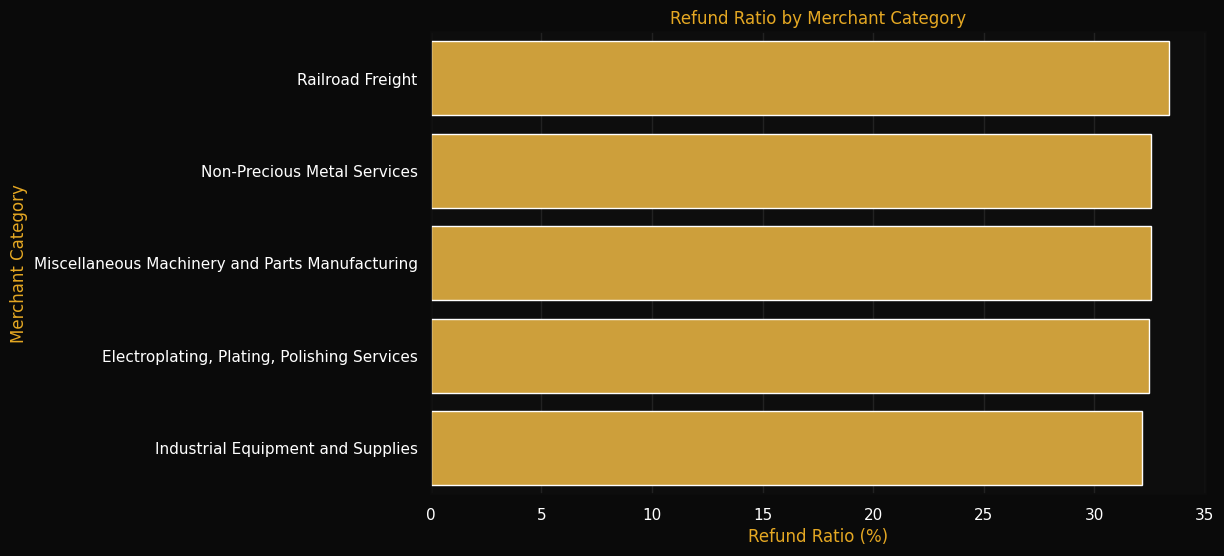

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=refund_by_merchant_category.head().reset_index(),
    y="mcc_category",
    x="refund_ratio",
)
plt.title("Refund Ratio by Merchant Category")
plt.xlabel("Refund Ratio (%)")
plt.ylabel("Merchant Category")
plt.show()


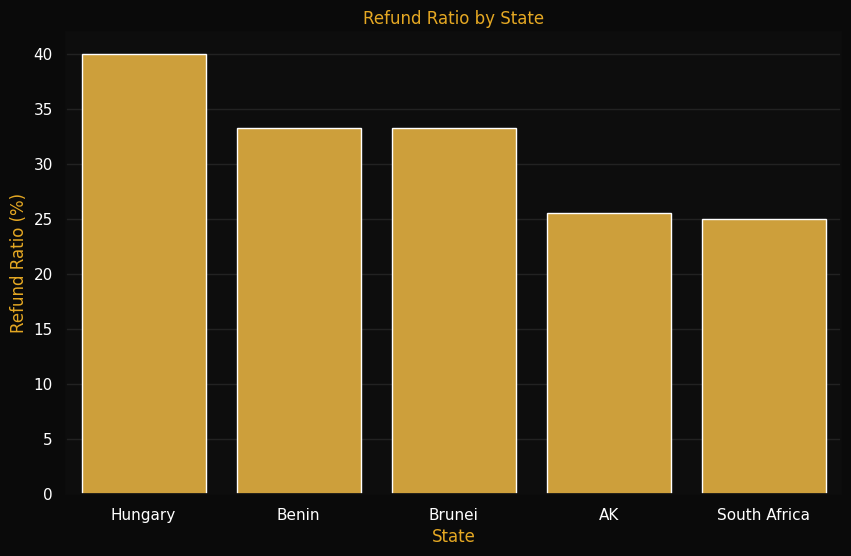

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=refund_by_state.head().reset_index(),
    x="merchant_state",
    y="refund_ratio",
)
plt.title("Refund Ratio by State")
plt.xlabel("State")
plt.ylabel("Refund Ratio (%)")
plt.show()


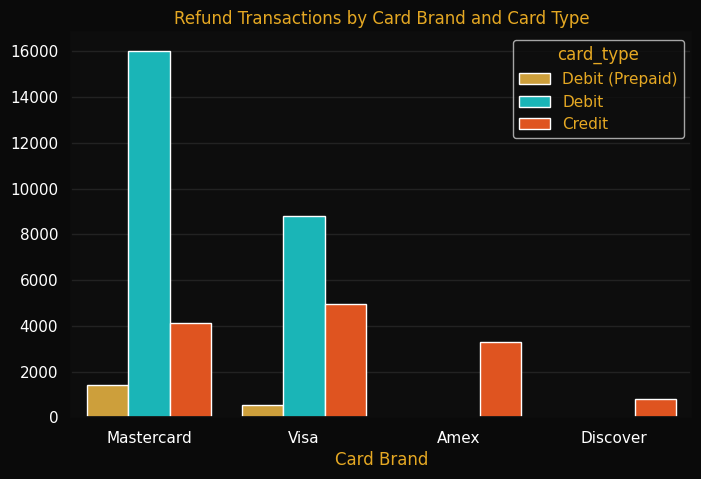

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_negative_amounts, x='card_brand',hue="card_type")
plt.title("Refund Transactions by Card Brand and Card Type")
plt.xlabel('Card Brand')
plt.ylabel('')
plt.show()

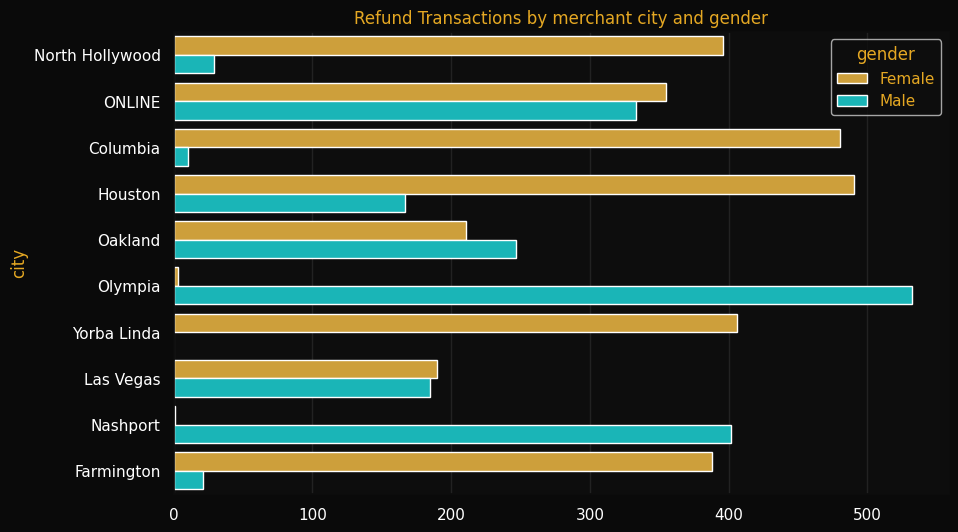

In [40]:
top_10_cities = df_negative_amounts['merchant_city'].value_counts().head(10)
top_10_cities = df_negative_amounts[df_negative_amounts['merchant_city'].isin(top_10_cities.index)]
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_cities, y='merchant_city',hue="gender")
plt.title("Refund Transactions by merchant city and gender")
plt.ylabel('city')
plt.xlabel('')
plt.show()

#**User Behavior and Transaction Trends**

**The distribution of user ages is right-skewed, with a small number of unusually high ages (90–100), which may be data entry errors or genuine senior users.**

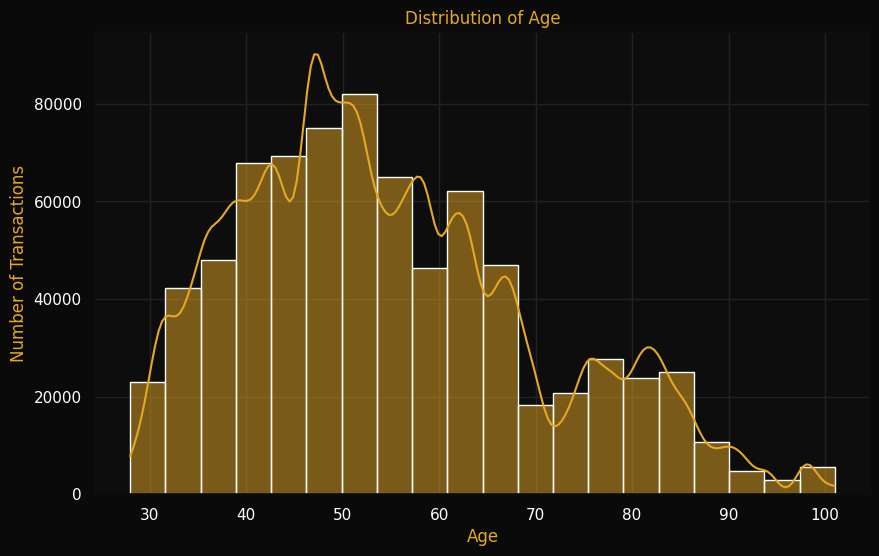

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x="current_age",bins=20,kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of Transactions")
plt.show()

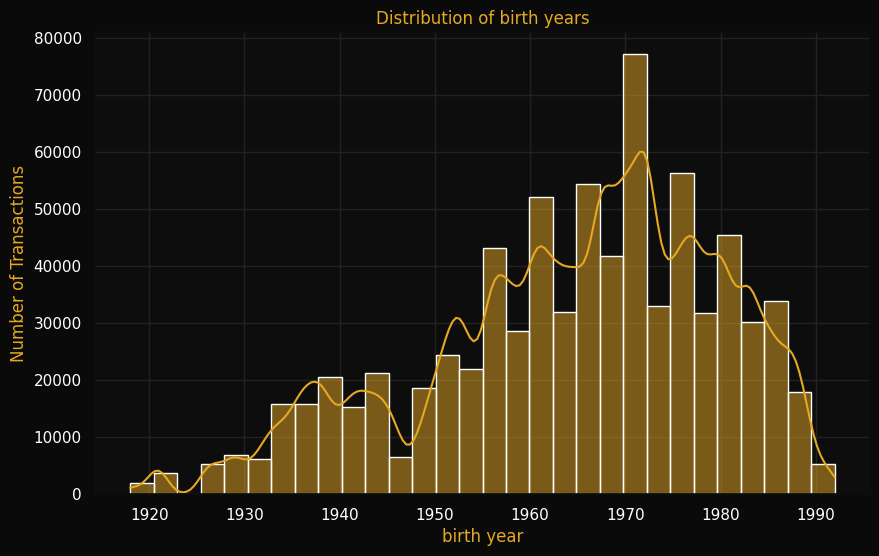

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x="birth_year",bins=30,kde=True)
plt.title("Distribution of birth years")
plt.xlabel("birth year")
plt.ylabel("Number of Transactions")
plt.show()

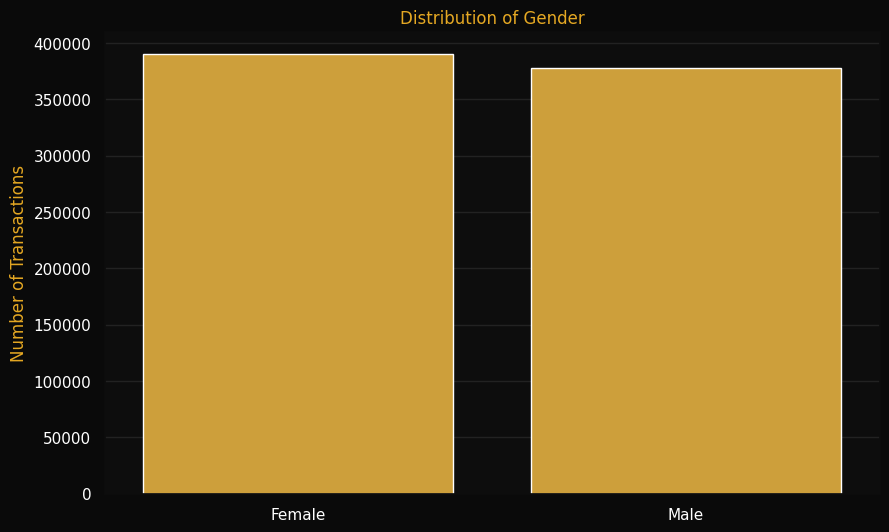

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender')
plt.title("Distribution of Gender")
plt.xlabel("")
plt.ylabel("Number of Transactions")
plt.show()

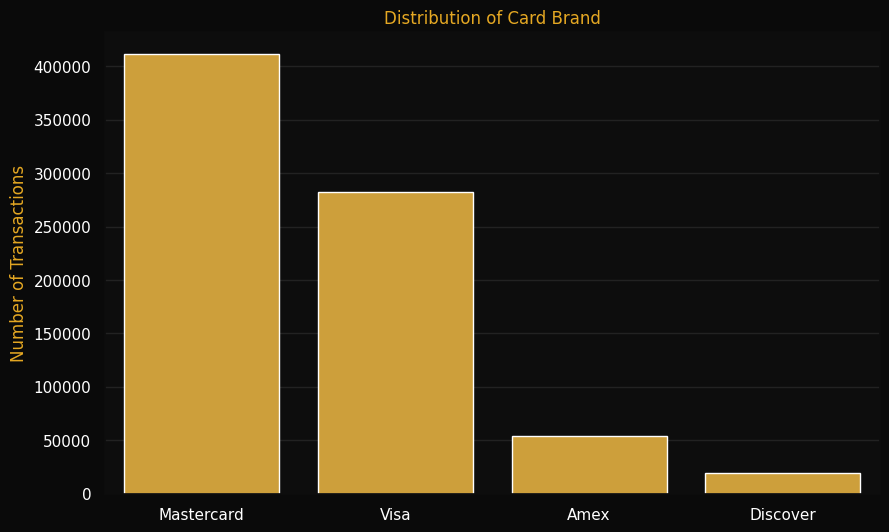

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='card_brand')
plt.title("Distribution of Card Brand")
plt.xlabel("")
plt.ylabel("Number of Transactions")
plt.show()

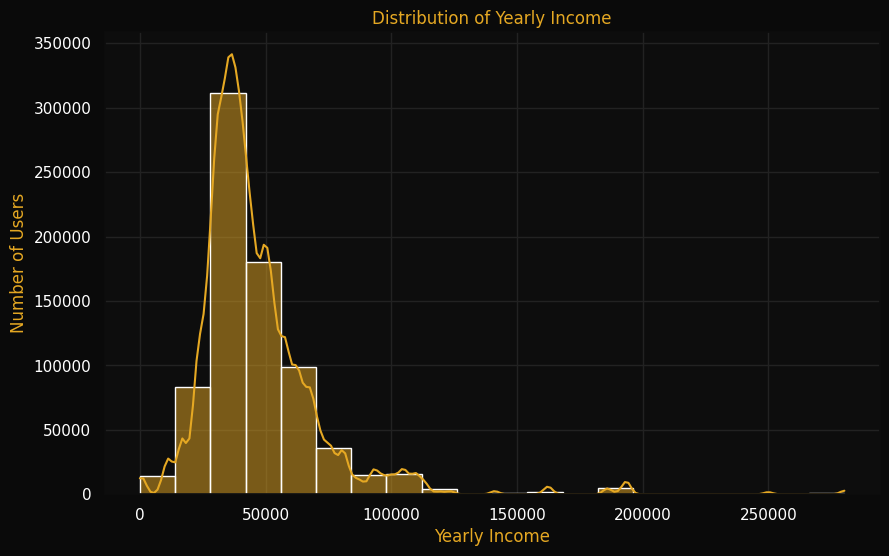

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='yearly_income', bins=20, kde=True)
plt.title("Distribution of Yearly Income")
plt.xlabel("Yearly Income")
plt.ylabel("Number of Users")
plt.show()


In [62]:
top_10_categories = df['mcc_category'].value_counts().head(10)
top_10_categories = df[df['mcc_category'].isin(top_10_categories.index)]

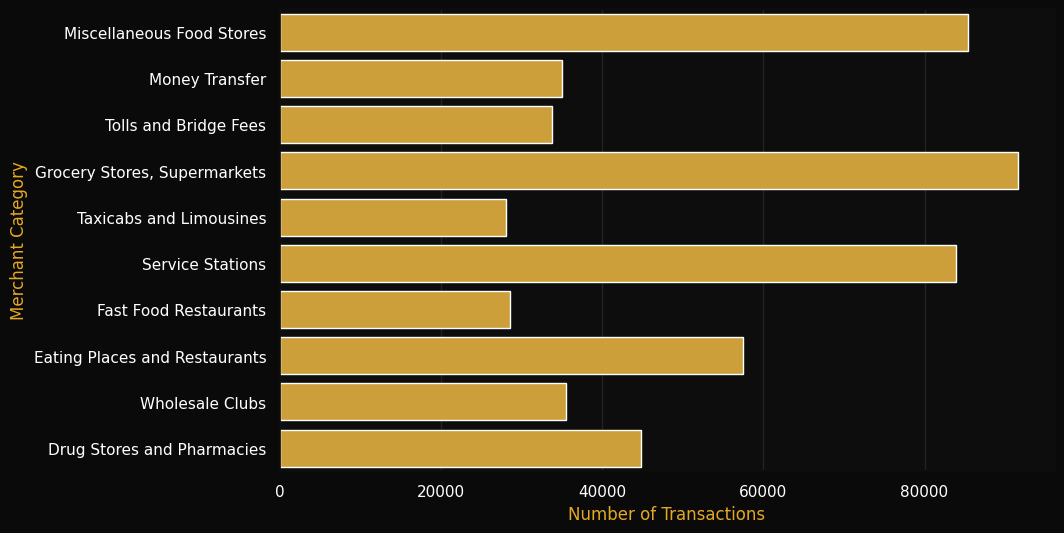

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_categories, y='mcc_category')
plt.ylabel("Merchant Category")
plt.xlabel("Number of Transactions")
plt.show()


In [64]:
top_10_cities = df['merchant_city'].value_counts().head(10)
top_10_cities = df[df['merchant_city'].isin(top_10_cities.index)]

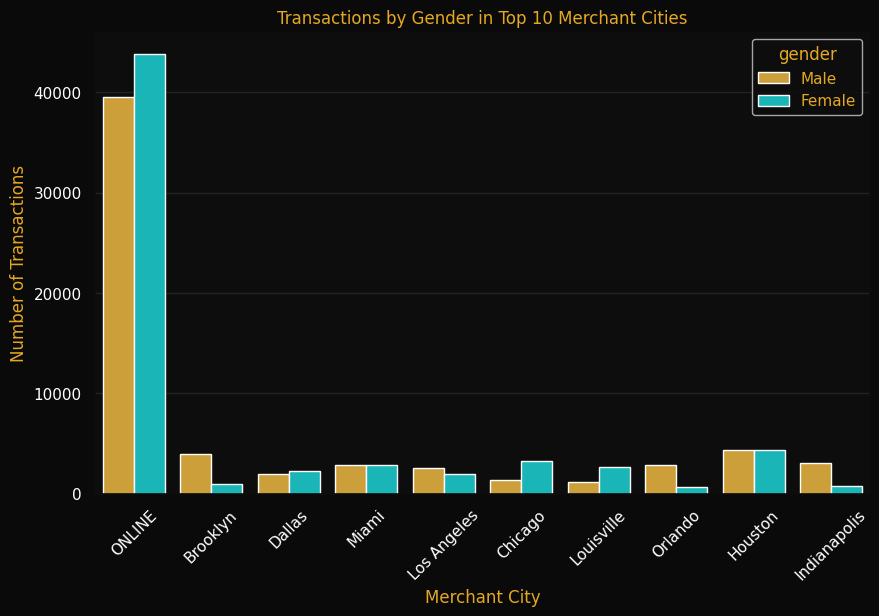

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_cities, x='merchant_city', hue="gender")
plt.title("Transactions by Gender in Top 10 Merchant Cities")
plt.xlabel("Merchant City")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


In [66]:
df['acct_open_date']=pd.to_datetime(df['acct_open_date'])

In [67]:
df['acct_open_year'] = df['acct_open_date'].dt.year

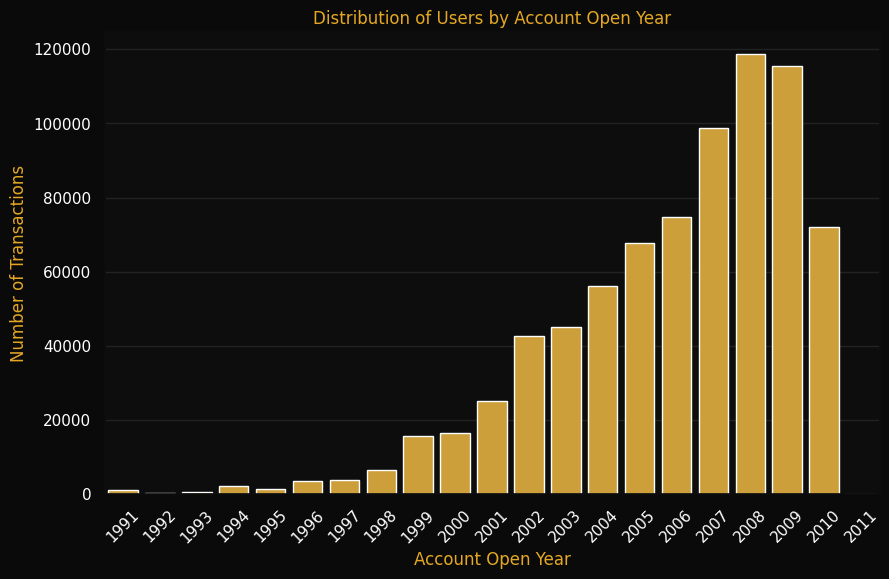

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='acct_open_year')
plt.title("Distribution of Users by Account Open Year")
plt.xlabel("Account Open Year")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

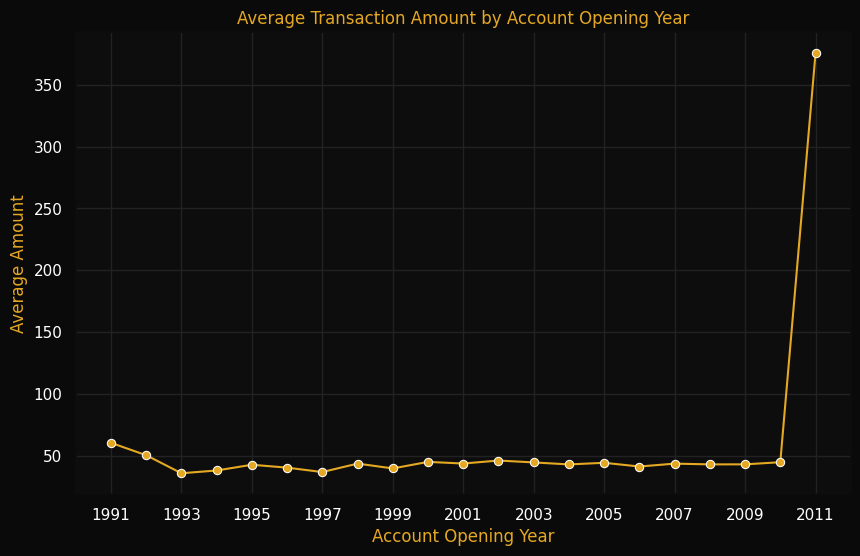

In [69]:
yearly_amount = df.groupby("acct_open_year")["amount"].mean().reset_index()
yearly_amount["acct_open_year"] = yearly_amount["acct_open_year"].astype(int)

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_amount, x="acct_open_year", y="amount", marker="o")
plt.title("Average Transaction Amount by Account Opening Year")
plt.xlabel("Account Opening Year")
plt.ylabel("Average Amount")
plt.xticks(range(yearly_amount["acct_open_year"].min(),
                 yearly_amount["acct_open_year"].max()+1, 2))
plt.show()



In [70]:
df.columns

Index(['transaction_id', 'date', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'mcc_category', 'is_fraud', 'card_brand', 'card_type',
       'expires', 'has_chip', 'num_cards_issued', 'credit_limit',
       'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web',
       'user_id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'acct_open_year', 'month_year'],
      dtype='object')

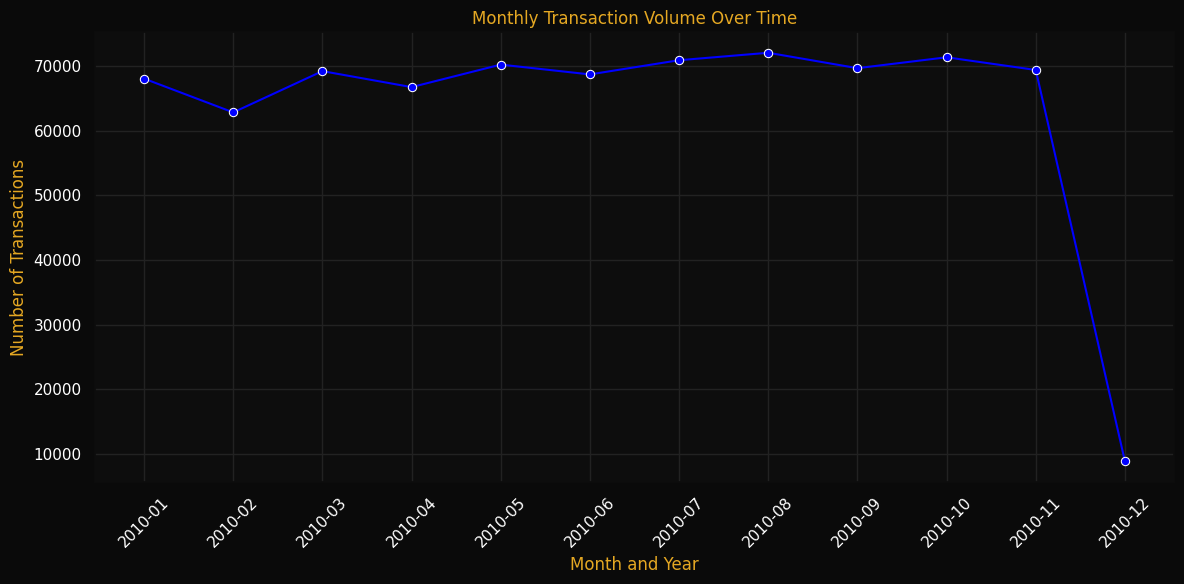

In [71]:
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')

txn_counts_by_month = df.groupby('month_year').size().reset_index(name='count')
txn_counts_by_month['month_year'] = txn_counts_by_month['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=txn_counts_by_month, x='month_year', y='count', marker='o', color="blue")
plt.title('Monthly Transaction Volume Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


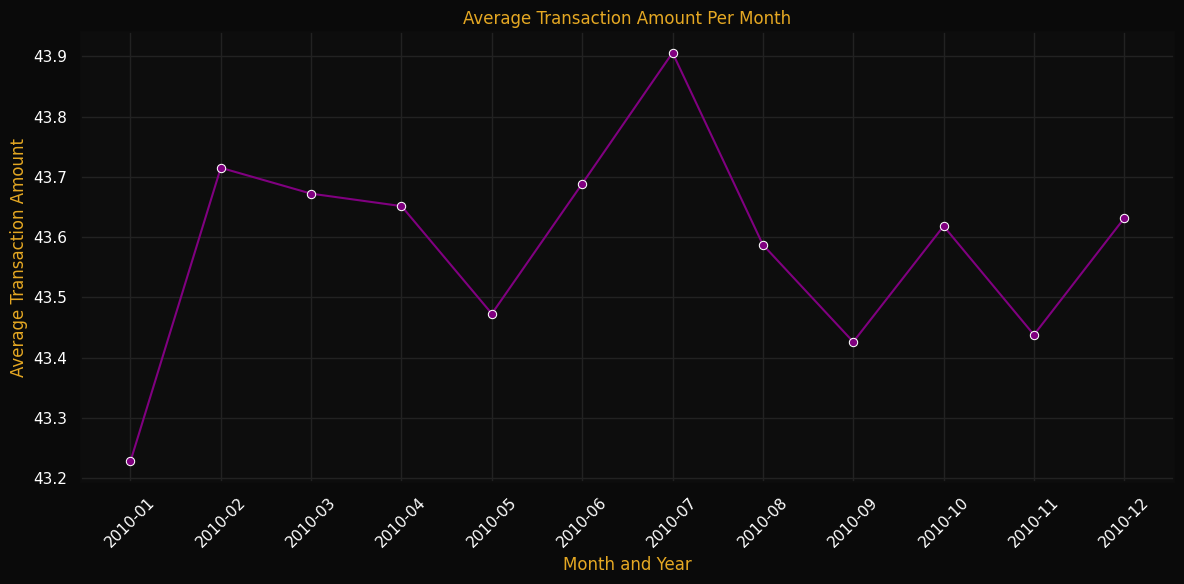

In [72]:
avg_txn_by_month = df.groupby('month_year')['amount'].mean().reset_index()
avg_txn_by_month['month_year'] = avg_txn_by_month['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_txn_by_month, x='month_year', y='amount', marker='o', color="purple")
plt.title('Average Transaction Amount Per Month')
plt.xlabel('Month and Year')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#**Top 5 Transactions Analysis**

In [79]:
top_5_amount_transactions = df.nlargest(5, 'amount')

In [80]:
top_5_amount_transactions['is_fraud'].value_counts()

,count
is_fraud,
1.0,3
0.0,2


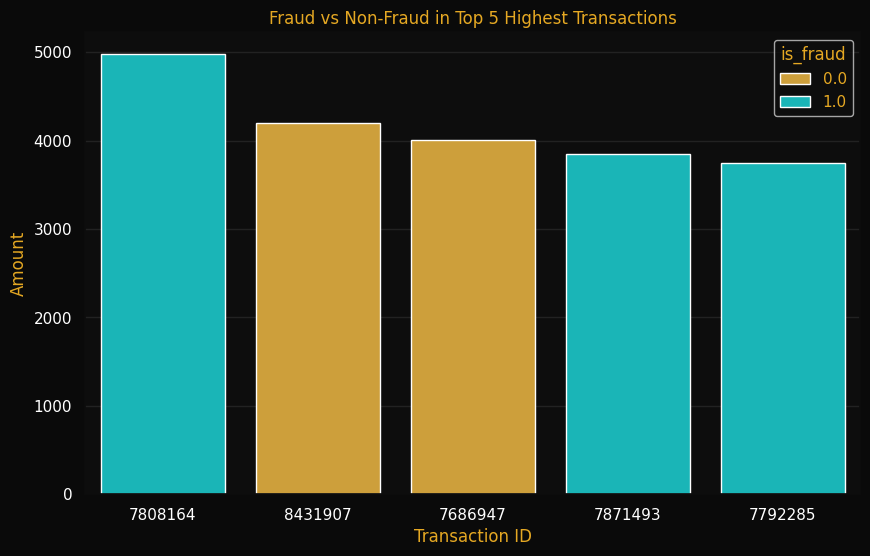

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_amount_transactions,
    x='transaction_id',
    y='amount',
    hue='is_fraud',
    order=top_5_amount_transactions['transaction_id']
)
plt.title("Fraud vs Non-Fraud in Top 5 Highest Transactions")
plt.xlabel("Transaction ID")
plt.ylabel("Amount")
plt.show()


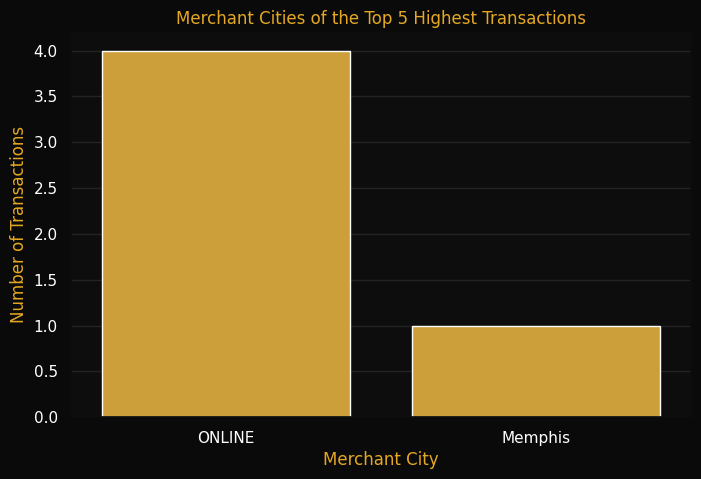

In [82]:
plt.figure(figsize=(8, 5))
sns.countplot(data=top_5_amount_transactions, x='merchant_city')
plt.title("Merchant Cities of the Top 5 Highest Transactions")
plt.xlabel("Merchant City")
plt.ylabel("Number of Transactions")
plt.show()


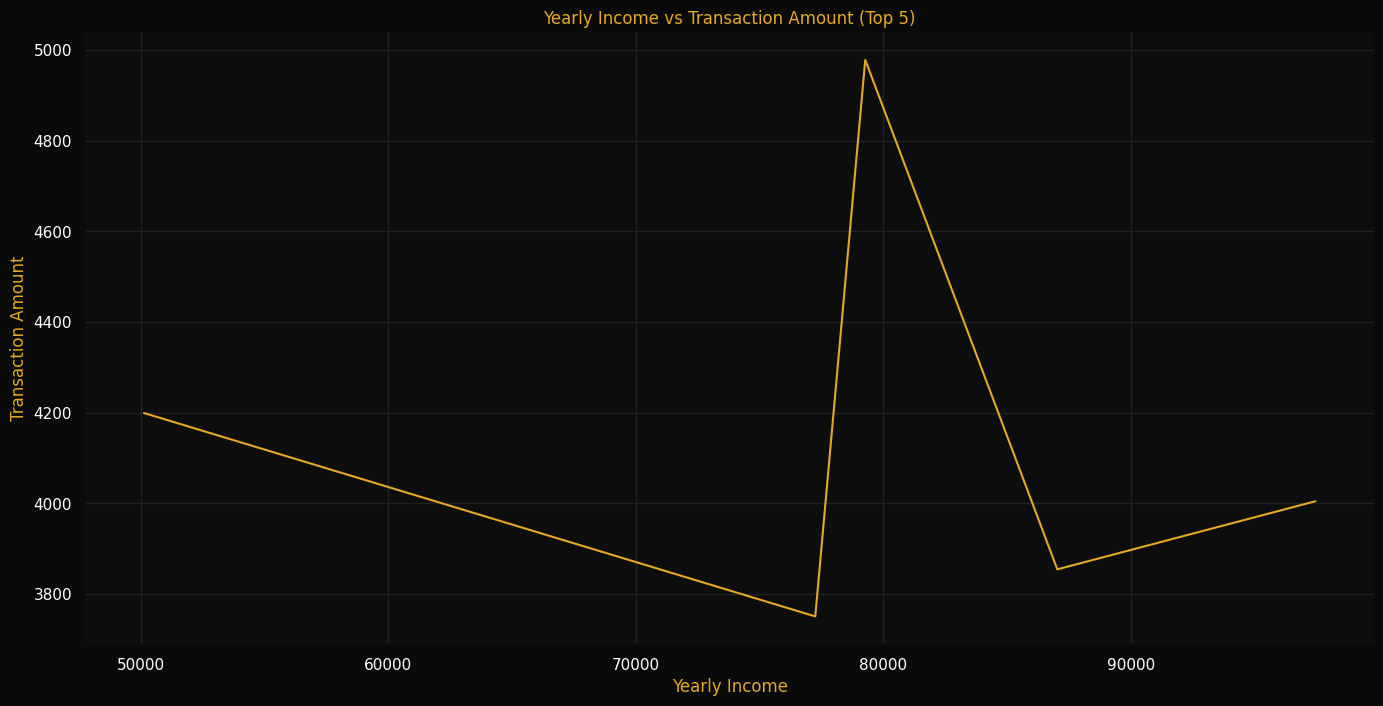

In [83]:
sns.relplot(
    data=top_5_amount_transactions,
    x="yearly_income",
    y="amount",
    kind="line",
    height=7,
    aspect=2
).set(
    title="Yearly Income vs Transaction Amount (Top 5)",
    xlabel="Yearly Income",
    ylabel="Transaction Amount"
)


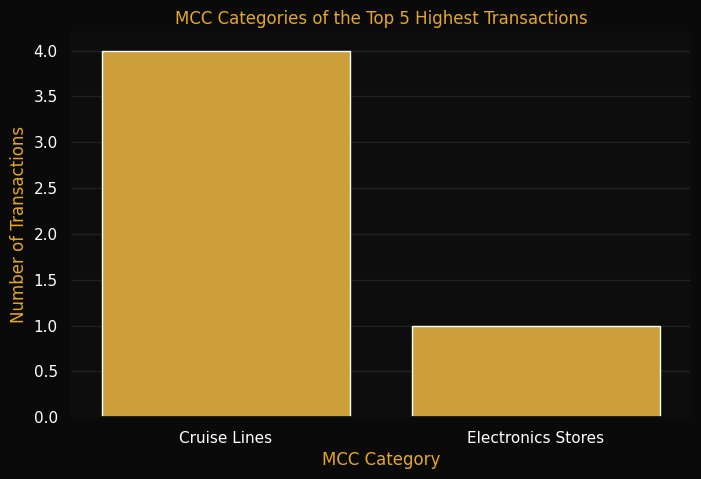

In [84]:
plt.figure(figsize=(8, 5))
sns.countplot(data=top_5_amount_transactions, x='mcc_category')
plt.title("MCC Categories of the Top 5 Highest Transactions")
plt.xlabel("MCC Category")
plt.ylabel("Number of Transactions")
plt.show()


#**Fraud Analysis**

In [85]:
def fraud_analysis(column, plot_func):
    fraud = df.groupby(column)['is_fraud'].sum().reset_index()
    fraud = fraud.sort_values(by='is_fraud', ascending=False)
    col_name = column.replace('_', ' ')
    plt.figure(figsize=(11, 6))
    plot_func(data=fraud.head(), x=column, y='is_fraud')
    plt.title(f"Top {col_name} by Number of Fraudulent Transactions")
    plt.xlabel(col_name)
    plt.ylabel("Number of Fraudulent Transactions")
    plt.show()


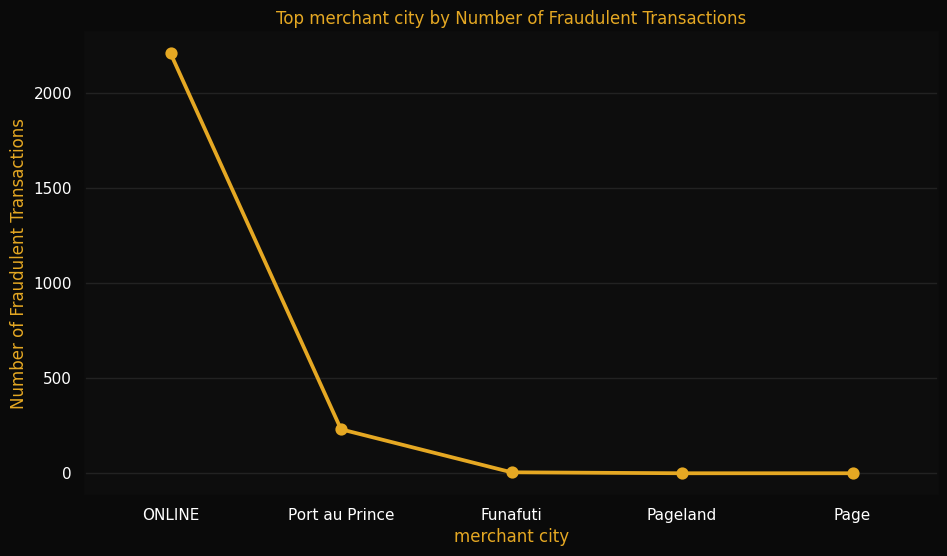

In [86]:
fraud_analysis('merchant_city',sns.pointplot)

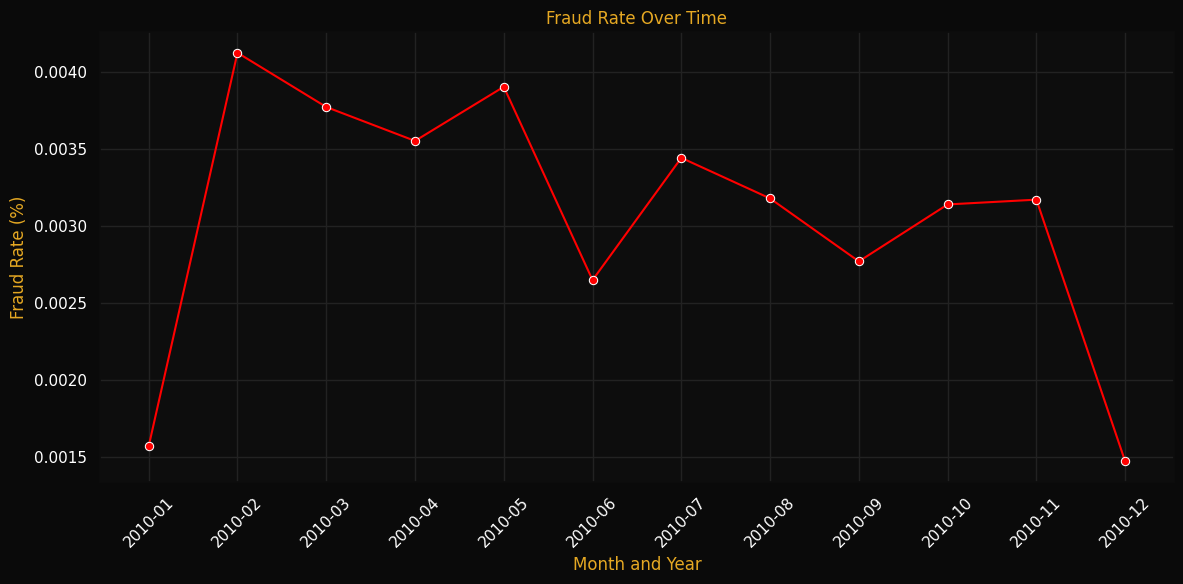

In [87]:
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')

fraud_rate_by_month = df.groupby('month_year')['is_fraud'].mean().reset_index()
fraud_rate_by_month['month_year'] = fraud_rate_by_month['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=fraud_rate_by_month, x='month_year', y='is_fraud', marker='o', color='red')
plt.title('Fraud Rate Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


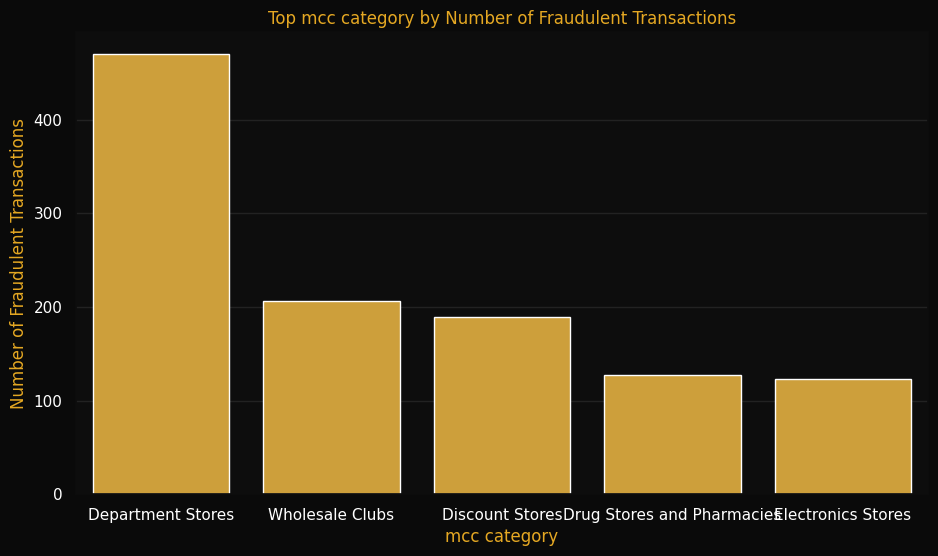

In [88]:
fraud_analysis('mcc_category',sns.barplot)

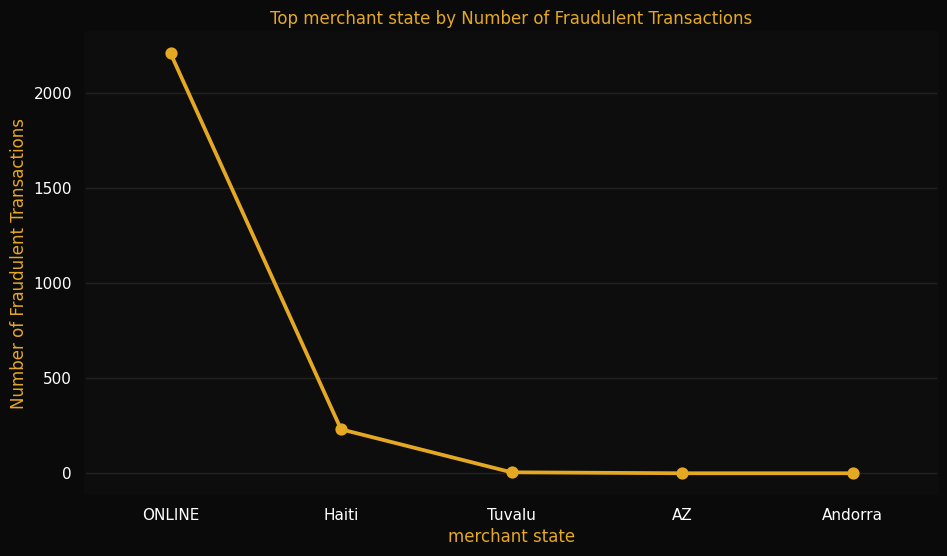

In [89]:
fraud_analysis('merchant_state',sns.pointplot)

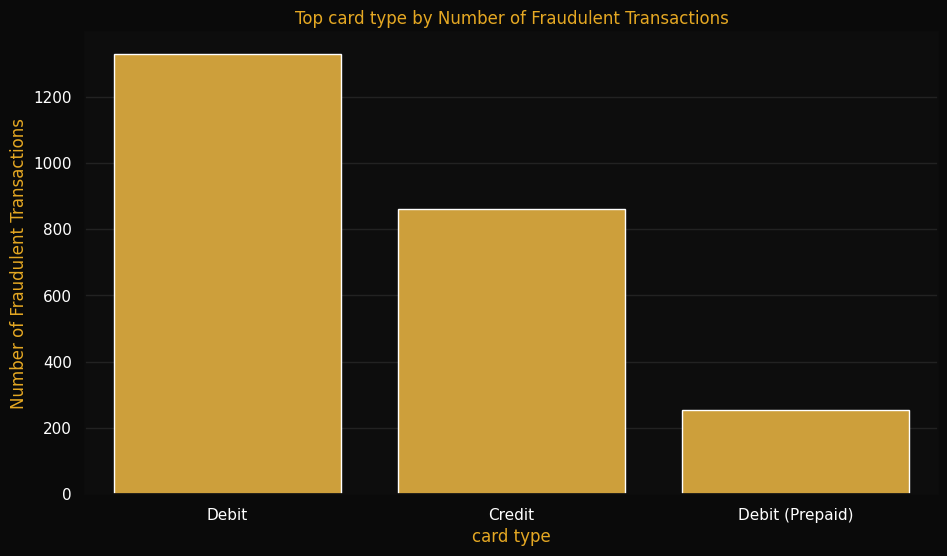

In [90]:
fraud_analysis("card_type",sns.barplot)

In [91]:
age_groups = df.groupby(pd.cut(df['current_age'], bins=[18, 25, 40, 80, 100])).agg(
    fraud_count=('is_fraud', 'sum'),
    total_count=('is_fraud', 'count')
).reset_index()

age_groups['fraud_ratio'] = (age_groups['fraud_count'] / age_groups['total_count']) * 100

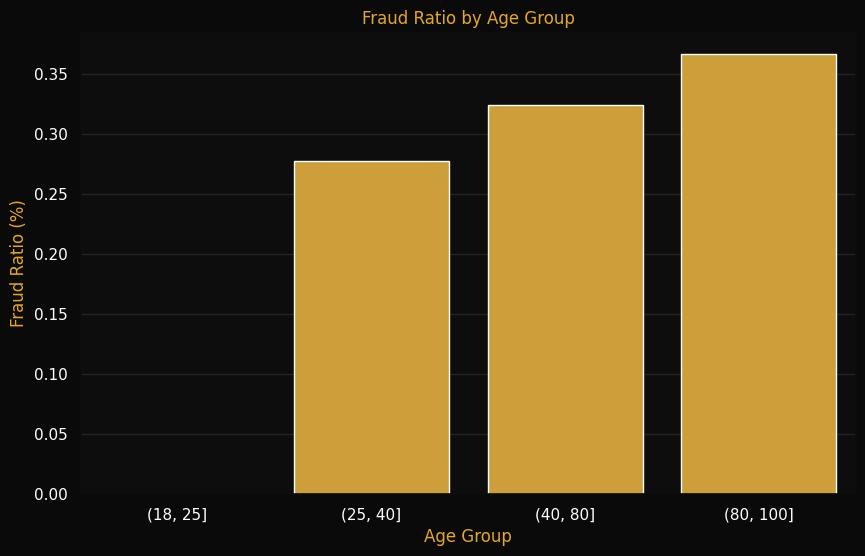

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_groups, x='current_age', y='fraud_ratio')
plt.title("Fraud Ratio by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Fraud Ratio (%)")
plt.show()

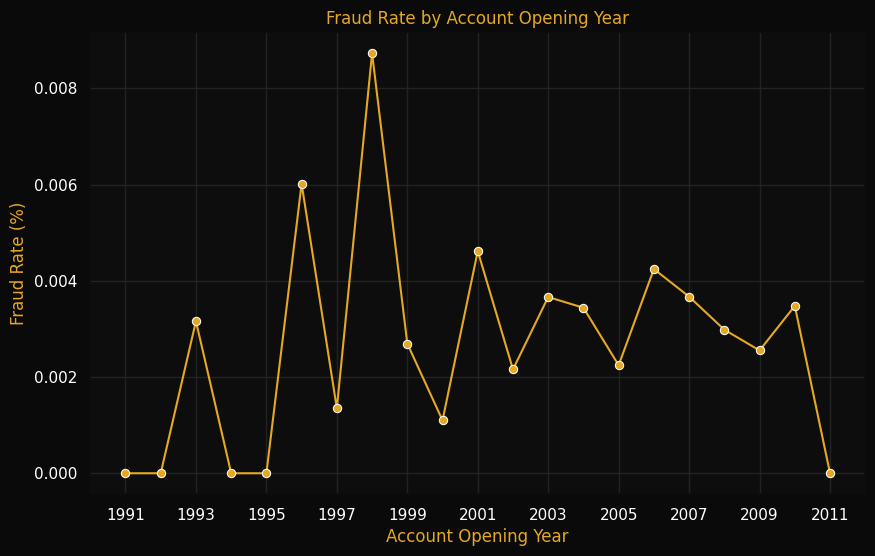

In [93]:
fraud_rate_year = df.groupby("acct_open_year")["is_fraud"].mean().reset_index()
fraud_rate_year["acct_open_year"] = fraud_rate_year["acct_open_year"].astype(int)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=fraud_rate_year,
    x="acct_open_year",
    y="is_fraud",
    marker="o"
)
plt.title("Fraud Rate by Account Opening Year")
plt.xlabel("Account Opening Year")
plt.ylabel("Fraud Rate (%)")

plt.xticks(range(fraud_rate_year["acct_open_year"].min(),
                 fraud_rate_year["acct_open_year"].max()+1, 2))

plt.show()
